## Oyh Oyh mouissaillon, va tu survive au Titanic ?

Tiré du Kaggle, Titanic (https://www.kaggle.com/c/titanic/overview)

In [1]:
import pandas as pd
from matplotlib import pyplot as plt


In [ ]:
#!pip list

### Téléchargement des csv

In [ ]:
!wget https://raw.githubusercontent.com/agconti/kaggle-titanic/master/data/test.csv --no-check-certificate
!wget https://raw.githubusercontent.com/agconti/kaggle-titanic/master/data/train.csv --no-check-certificate
#!wget https://raw.githubusercontent.com/minsuk-heo/kaggle-titanic/master/input/gender_submission.csv --no-check-certificate

### Analyse basique des données de "Train.csv"

On importe les deux dataset, et on ne va se servir que de "train" (jeu d'entrainement pour l'algorithme) pour le moment, le "test" servira pour vérifier la véracité de notre algo sur la survie.
En effet, le sujet est tiré d'un concours sur kaggle ou le jeu de donnée est déjà séparé en deux.

In [2]:
# la méthode read de pandas, se traduit bien d'elle même (งツ)ว

df = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

# une liste contenant les deux fichiers, pour appliquer le nettoyage au deux d'un coup

dataset = [df, df_test]

In [51]:
### info, pour avoir des infos rapidement sur le type dans les colonnes, 
## ainsi que sur le nom des colonnes, plus les valeurs nulles 

print("******\ntrain\n")
print(df.info())
print("\n******\ntest\n")
df_test.info()

******
train

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None

******
test

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 

### 891 lignes au total pour le train, 418 pour le test, et on constate que dans les deux il manque beaucoup de donnée dans "Age" et dans "Cabin"

In [52]:
# pour confirmer les entrées dans le csv

df.isnull().sum().sort_values(ascending=False) 

Cabin          687
Age            177
Embarked         2
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
SibSp            0
Parch            0
Ticket           0
Fare             0
dtype: int64

In [61]:
# aperçu de ce qu'il y a dans le tableau, 
# en affichant des entrées au hasard

df.sample(7)

# il y a aussi : head() > pour afficher les 5 premieres lignes
# ou tail()  > dernieres valeurs du dataframe

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
600,601,1,2,"Jacobsohn, Mrs. Sidney Samuel (Amy Frances Chr...",female,24.0,2,1,243847,27.0000,NaN,S
542,543,0,3,"Andersson, Miss. Sigrid Elisabeth",female,11.0,4,2,347082,31.2750,NaN,S
448,449,1,3,"Baclini, Miss. Marie Catherine",female,5.0,2,1,2666,19.2583,NaN,C
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
801,802,1,2,"Collyer, Mrs. Harvey (Charlotte Annie Tate)",female,31.0,1,1,C.A. 31921,26.2500,NaN,S
356,357,1,1,"Bowerman, Miss. Elsie Edith",female,22.0,0,1,113505,55.0000,E33,S
389,390,1,2,"Lehmann, Miss. Bertha",female,17.0,0,0,SC 1748,12.0000,NaN,C


## A partir de maintenant, on analyse seulement le train, mais on applique les méthodes aux deux dataframes

In [60]:
# describe permet de donner le total, la moyenne, l'écart type, la valeur minimale, 
# le 1er quartile jusqu'a la valeur la plus importante
# mais bien sur, cela ne fonctionne qu'avec les valeurs numériques

df.describe()

# on peut passer l'argument"""  include='all'  """pour prendre en compte les valeur non numérique

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## Quelques visualisations pour se représenter le dataset

<AxesSubplot:ylabel='Frequency'>

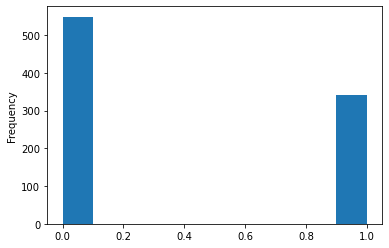

In [7]:
## pandas permet de faire un graphique plutot facilement en 1 seule ligne
# ici en retirant ) # on ajoute seulement 2 argument, et c'est déjà plus présentable

df["Survived"].plot(kind="hist") #, figsize=(5,11), title="Survivants")   

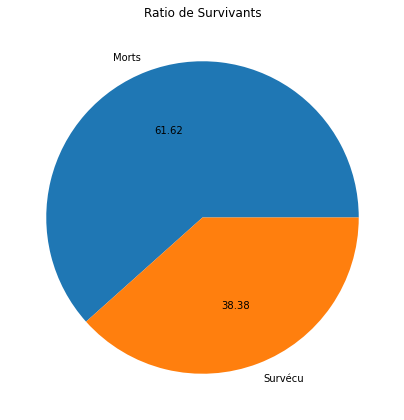

In [8]:
# même colonne, mais avec plus d'argument pour rendre le graphique plus parlant

df.Survived.value_counts().plot(      # le value_counts pour grouper tous les 1 et 0 ensembles

    kind="pie", # kind pour les différents types de graph, ici un camembert
    figsize=(7,11), # la taille affiché dans la cellule, Largeur Hauteur
    labels=["Morts", "Survécu"], # le nom de chaque partie
    autopct="%.2f", # pour afficher le % 
    title="Ratio de Survivants", # le titre du graphique
    ylabel="" # aussi non affiche le nom de la colone a gauche du graph
    )
plt.show()  # c'est optionel dans un notebook, mais plus propre

### Attention aux yeux  (っ▀¯▀)つ
#### mais, bon y'a des informations utiles 

<AxesSubplot:>

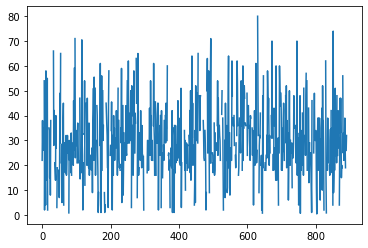

In [73]:
# ca c'est cadeau, de la part de pandas pour nos cerveaux
# pour chaque index (l'axe horizontal)
# affiche l'age (l'age vertical)


df.Age.plot()


# mais sans aucun argument, plot() donne un résultat, pas optimal mais il y a bien une sortie

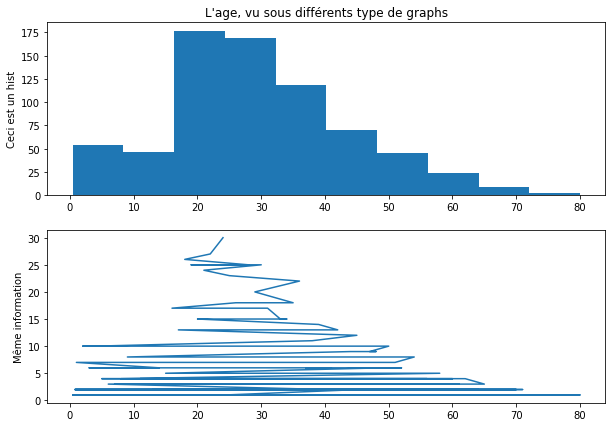

In [9]:
# c'est clair ?

plt.subplot(2, 1, 1)  #  2 lignes et 1 colonnes, c'est le 1er du bloc
df.Age.plot(kind="hist", figsize=(10,7), ylabel="")
plt.title("L'age, vu sous différents type de graphs")
plt.ylabel("Ceci est un hist")

plt.subplot(2, 1, 2)  # 2 lignes 1 col 2eme du bloc
df.Age.value_counts().plot()  ## oui c'est les même informations, mais moins lisible
plt.ylabel("Même information")

plt.show()  

## Interlude 
### recherche sur les données :
<lu> <li> Comment récupérer un Age précis </li><li> Ou se trouve ses valeurs dans le tableau </li> <li> Appliquer une fonction sur une colonne </li><li>les types dans pandas</li>
</lu>

### Où est toto sur le bateau ??
#### Enquête grace à son age, il a 7 ans

In [64]:
## nunique indique le nombre de valeur différentes dans cette colonne
# unique montre toutes les valeurs de celle ci


print("Il y a " + str(df.Age.nunique()) + " ages différents répertorié\n Et les voicis tous \n\n")
print(df.Age.unique())
print()
print(type(df.Age.unique()))
print("\nMais " + str( df.Age.isnull().sum() ) + " ligne ne contenant pas l'age, ce qui peut poser problème avec certaine méthodes ou graph")


# df["colonne"].isnull().sum() -> donne le nombre de nan dans la col


Il y a 88 ages différents répertorié
 Et les voicis tous 


[22.   38.   26.   35.     nan 54.    2.   27.   14.    4.   58.   20.
 39.   55.   31.   34.   15.   28.    8.   19.   40.   66.   42.   21.
 18.    3.    7.   49.   29.   65.   28.5   5.   11.   45.   17.   32.
 16.   25.    0.83 30.   33.   23.   24.   46.   59.   71.   37.   47.
 14.5  70.5  32.5  12.    9.   36.5  51.   55.5  40.5  44.    1.   61.
 56.   50.   36.   45.5  20.5  62.   41.   52.   63.   23.5   0.92 43.
 60.   10.   64.   13.   48.    0.75 53.   57.   80.   70.   24.5   6.
  0.67 30.5   0.42 34.5  74.  ]

<class 'numpy.ndarray'>

Mais 177 ligne ne contenant pas l'age, ce qui peut poser problème avec certaine méthodes ou graph


In [56]:
# pour trouver une valeur avec une condition 

df[df["Age"] == 7]

# mais ceci affiche un tableau, pas toto, bon ils étaient plusieurs à avoir 7ans, affinons la recherche

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
50,51,0,3,"Panula, Master. Juha Niilo",male,7.0,4,1,3101295,39.6875,NaN,S
278,279,0,3,"Rice, Master. Eric",male,7.0,4,1,382652,29.1250,NaN,Q
535,536,1,2,"Hart, Miss. Eva Miriam",female,7.0,0,2,F.C.C. 13529,26.2500,NaN,S


In [74]:
# et si on écrit tout juste == 7 ? 

df.Age == 7

0      False
1      False
2      False
3      False
4      False
       ...  
886    False
887    False
888    False
889    False
890    False
Name: Age, Length: 891, dtype: bool

In [ ]:
### Détail :   df.Age ou df["Age"]   ??? 


## le premier fonctionne pour les nom de colonnes sans espaces ou caractère spéciaux
## la deuxième est la "bonne" convention

 
#  mais alors pourquoi la première est possible ?? 
#  ¯\_(ツ)_/¯

In [80]:
# Pandas est permissif, pas mal de fonction ou de syntaxe pour presque les même résultats,
# a choisir en fonction des besoins, 
# et surtout ne renvoient pas le même type

print("Le tableau")
print(type(df[df["Age"] == 7]))
print("\nLa colonne remplit de False ou True")
print(type(df.Age == 7))
print(" \n( ˘ ɜ˘) ♬♪♫\n")
print("\nComme déjà utilisé plutot, sum(), additionne, et renvoi :")
print((df_train.Age==7).sum())
print(type((df_train.Age==7).sum()))

Le tableau
<class 'pandas.core.frame.DataFrame'>

Lacolonne remplit de False ou True
<class 'pandas.core.series.Series'>
 
( ˘ ɜ˘) ♬♪♫


Comme déjà utilisé plutot, sum(), additionne renvoi :
3
<class 'numpy.int64'>


In [87]:
# Capturons tous ceux qui ont l'age de toto

age_de_toto = df[df["Age"] == 7]
age_de_toto = age_de_toto.index.tolist()
age_de_toto

# en une seule ligne ♪♪
# df.index[df["Age"] == 7].tolist()

[50, 278, 535]

In [9]:
# voyons un élement en choisisant son index, bienvenu iloc
df.iloc[50]

7.0


PassengerId                            51
Survived                                0
Pclass                                  3
Name           Panula, Master. Juha Niilo
Sex                                  male
Age                                   7.0
SibSp                                   4
Parch                                   1
Ticket                            3101295
Fare                              39.6875
Cabin                                 NaN
Embarked                                S
Name: 50, dtype: object

In [10]:
# on peut aussi utiliser iloc avec une colonne, pour avoir sa valeur

df.iloc[42].Age

nan

## Il y a des valeurs non défini dans l'age, il y a plusieurs moyen de combler les trou du tableau : 
<lu><li> en retirant les lignes </li> <li>en appliquant la moyenne totale du tableau et l'appliquer sur les nan</li> <li> faire un random sur toutes les valeurs manquante, et définir la largeur du pool de random</li> <li> faire du feature enginnering et prendre plusieurs autres variables et en déterminer un age en fonction des autres valeurs</li> <li> en faissant des recherches sur toutes les personnes manquante et compléter l'information</li></lu>

In [29]:
# des maths avec python 

age_0 = df[df["Age"] < 1]
print(age_0.Age)
print()
print([int(x) for x in age_0.Age])

# int() va juste retirer les virgules, et donc garder le chiffre
# alors que round() va arondir, au supérieur au inférieur en fonction de .5

print([round(x) for x in age_0.Age])

78     0.83
305    0.92
469    0.75
644    0.75
755    0.67
803    0.42
831    0.83
Name: Age, dtype: float64

[0, 0, 0, 0, 0, 0, 0]
[1, 1, 1, 1, 1, 0, 1]


In [53]:
## supressions des valeurs non indiqué dans cette colonne et engeristré dans une nouvelle variable
# sur laquel on applique la méthode round pour l'avoir que des int et non float 


age_rond = df.Age.dropna()
age_rond = [round(x) for x in age_rond]

# avant, après 

print("Avant néttoyage " + str(len(df.Age)) + " lignes avec des ages en float (donc avec virgule)\n")
print("Après supression des lignes nan et arondisage " + str(len(age_rond)) + " entrée")

Avant néttoyage 891 lignes avec des ages en float (donc avec virgule)

Après supression des lignes nan et arondisage 714 entrée


In [66]:
# remplacer les nan par la moyenne de la colonne

df["Age_moyen"] = df["Age"].fillna(df["Age"].mean())
type(df.Age_moyen)

pandas.core.series.Series

In [54]:
# conversion en Series, pour appliquer des méthodes de pandas à la liste

print(type(age_rond))
print(age_rond[:10])

age_rond = pd.Series(age_rond)
print("\nd'une ligne on passe à une colonne \n")
print(type(age_rond))
print(age_rond[:10])

<class 'list'>
[22, 38, 26, 35, 35, 54, 2, 27, 14, 4]

d'une ligne on passe à une colonne 

<class 'pandas.core.series.Series'>
0    22
1    38
2    26
3    35
4    35
5    54
6     2
7    27
8    14
9     4
dtype: int64


In [67]:
print(len(df.Age))
print(len(age_rond))
print(len(df.Age_moyen))

891
714
891


In [69]:
print(df.Age.isnull().sum())
print(age_rond.isnull().sum())
print(df.Age_moyen.isnull().sum())


177
0
0


In [68]:
## si on veut garder toutes les lignes dans le tableau et appliquer une fonction pour ne pas en supprimer

print("Actuellement l'age moyen en comptant les valeurs manquante est de : " + str(df.Age.mean()))
print("\nAlors que l'age en retirant les nan et en ayant arrondis : " + str(age_rond.mean()))
print("\nEt enfin, en appliquant la moyenne aux valeurs manquante : " + str(df.Age_moyen.mean()))

Actuellement l'age moyen en comptant les valeurs manquante est de : 29.69911764705882

Alors que l'age en retirant les nan et en ayant arrondis : 29.69327731092437

Et enfin, en appliquant la moyenne aux valeurs manquante : 29.69911764705882


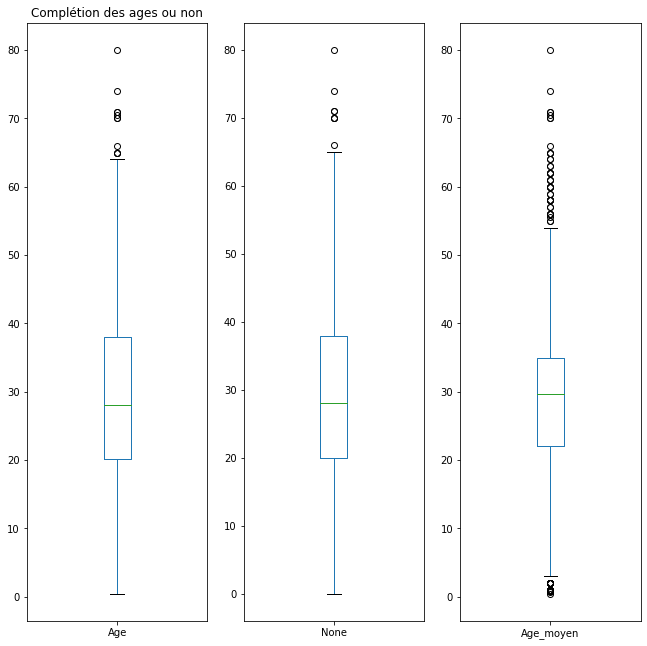

In [71]:
plt.subplot(1,3,1)
df.Age.plot(kind="box", figsize=(11,11))
plt.title("Complétion des ages ou non")

plt.subplot(1,3,2)
age_rond.plot(kind="box", figsize=(11,11))

plt.subplot(1,3,3)
df.Age_moyen.plot(kind="box", figsize=(11,11))
plt.show()

In [ ]:
df_train.Age.plot(kind="bar")

In [ ]:
df_train.Age.value_counts().plot(kind="bar")

In [ ]:
df_train.Age.plot(kind="box")

In [ ]:
g = sns.PairGrid(df)
g.map(sns.scatterplot)

enfant = df[(df["Age"] >= 0) & (df["Age"] <= 10)]
ado = df[(df["Age"] >=11) & (df["Age"] <= 20)]
adulte = df[(df["Age"] >=21) & (df["Age"] <= 50)]
ancien = df[(df["Age"] >=51)]
type(enfant)

df.Age = df.Age.map({'enfant' : 0, 'ado' : 1, 'adulte' : 2, 'ancien' : 3})

In [ ]:
df.Sex = df.Sex.map({'female' : 0, 'male' : 1})

In [ ]:
df.Sex.value_counts().plot(kind="bar", figsize=(5,11))

#### Création de la colone de la langue parlé, si le passager à embarqué à Cherbourg ou non 

In [ ]:
df.Embarked.nunique()

In [ ]:
df["Embarked"].unique()

In [ ]:
df.Embarked = df.Embarked.map({'C' : 0, 'Q' : 1, 'S' : 2})
anglophone = (df["Embarked"] == 1) | (df["Embarked"] == 2)
df["anglophone"] = anglophone

In [ ]:
df.Embarked.plot(kind='hist', figsize=(7,11))

### Transformation en int

In [ ]:
#df.anglophone = df.anglophone.map({'False' : 0, 'True' : 1})

In [ ]:
df["anglophone"] = df["anglophone"].astype(int)

In [ ]:
df.anglophone.value_counts()

In [ ]:
anglophone.unique()

In [ ]:
df.anglophone.unique()

In [ ]:
df["anglophone"]

In [ ]:
df.anglophone.plot(kind="hist", figsize=(7,11))

In [ ]:
pd.pivot_table(df, 
               values='Survived',
               index=['Pclass', "anglophone"],
               columns=['Sex'],
               aggfunc='sum'
              ).plot(kind='bar', figsize=(11,11))

#### maintenant occupons nous de la colonne age, basiquement on va modifier les valeurs manquante par la moyenne, puis on supprime les colonnes qui ne nous intéresse pas pour le ML

In [ ]:
df.info()

In [ ]:
df["Age"] = df["Age"].fillna(df["Age"].mean())

In [ ]:
df = df.drop(["Cabin", "Embarked", "Ticket", "Name", "Fare","PassengerId" ], axis=1)

In [ ]:
df_test = pd.read_csv("test.csv")

In [ ]:
df_test["Survived"] = ''
df_test["Survived"] = pd.to_numeric(df.Survived)
df_test.Embarked = df_test.Embarked.map({'C' : 0, 'Q' : 1, 'S' : 2})
anglophone = (df_test["Embarked"] == 1) | (df_test["Embarked"] == 2)
df_test["anglophone"] = anglophone
df_test["anglophone"] = df_test["anglophone"].astype(int)
df_test.Sex = df_test.Sex.map({'female' : 0, 'male' : 1})
df_test["Age"] = df_test["Age"].fillna(df_test["Age"].mean())
df_test = df_test.drop(["Cabin", "Embarked", "Ticket", "Name", "Fare","PassengerId"], axis=1)

In [ ]:
df_test = df_test[['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'anglophone']]

In [ ]:
df.info()

### Début de l'utilisation des données

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
X = df
y = df.Survived

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.28, random_state=42, stratify=y)

In [ ]:
model = xgb.XGBClassifier()
model.fit(X_train, y_train)

In [ ]:
xgb.plot_importance(model)

In [ ]:
model.score(X_train, y_train)

In [ ]:
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]

In [ ]:
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

In [ ]:
nage = model.predict(df_test)
nageur = [round(value) for value in nage]
alors = accuracy_score(nage, nageur)
print("Accuracy: %.2f%%" % (alors * 100.0))

In [ ]:
boost = xgb.Booster({'nthread': 4})
boost.load_model()
X = df
y = df.Survived

dtest = xgb.DMatrix(X)
pred = boost.predict(dtest)
pred_bin = [round(value) for value in pred]